In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

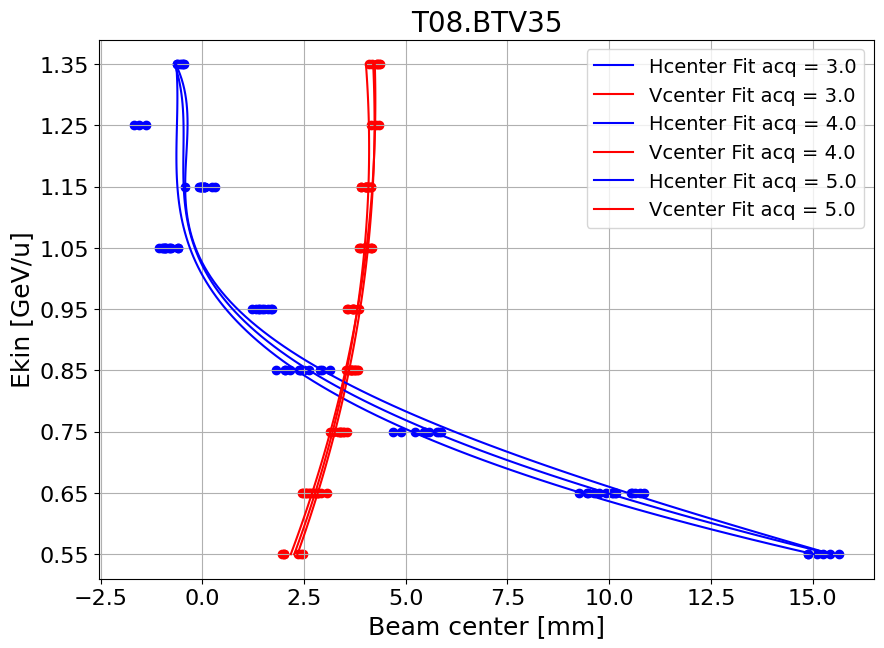

In [2]:
fig, ax = plt.subplots(figsize=(10,7))

for file in [
             "Ekin_vs_beam_center_btv35_acq3.pickle",
             "Ekin_vs_beam_center_btv35_acq4.pickle",
             "Ekin_vs_beam_center_btv35_acq5.pickle",
             ]:

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

    ax.scatter(df_enhanced.Hcenter, df_enhanced.Ekin, marker="o", c="b")
    ax.scatter(df_enhanced.Vcenter, df_enhanced.Ekin, marker="o", c="r")

    # Fit a second-order polynomial to Hcenter
    coeffs_h = np.polyfit(df_enhanced.Ekin, df_enhanced.Hcenter, 4)

    # Fit a second-order polynomial to Vcenter
    coeffs_v = np.polyfit(df_enhanced.Ekin, df_enhanced.Vcenter, 2)

    # Create a range of Ekin values for the fitted curves
    Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)

    # Calculate the corresponding Hcenter and Vcenter values using the fitted polynomials
    Hcenter_fit = np.polyval(coeffs_h, Ekin_range)
    Vcenter_fit = np.polyval(coeffs_v, Ekin_range)

    ax.plot(Hcenter_fit, Ekin_range, c="b", label=f"Hcenter Fit acq = {df_enhanced.acq[0]}")
    ax.plot(Vcenter_fit, Ekin_range, label=f"Vcenter Fit acq = {df_enhanced.acq[0]}", c="r")


ax.legend()
ax.grid()
ax.set_yticks(list(df_enhanced.Ekin.unique()));

ax.set_xlabel("Beam center [mm]")
ax.set_ylabel("Ekin [GeV/u]")
ax.set_title("T08.BTV35")

plt.savefig("Ekin_vs_beam_center_btv35_combined.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

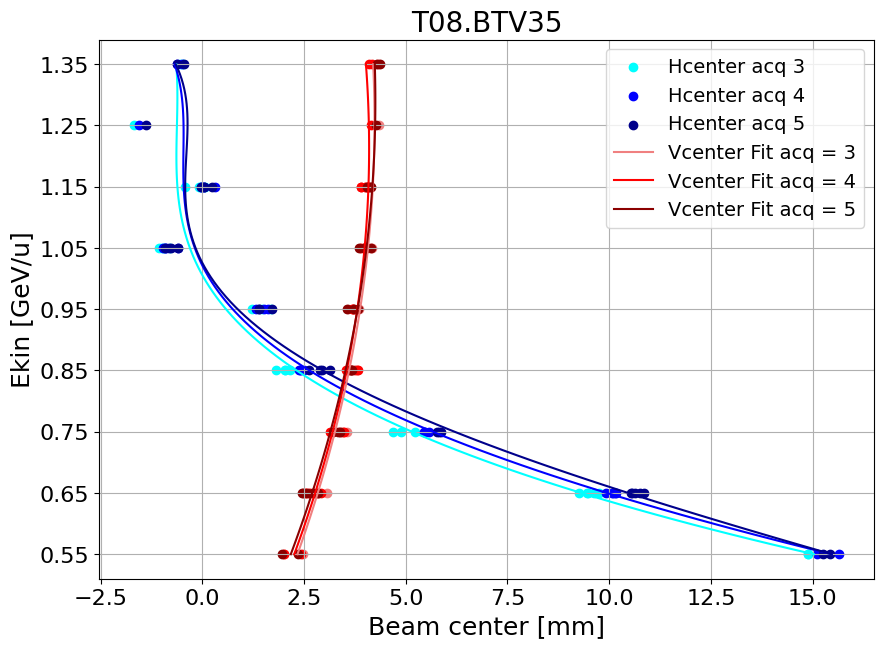

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Define lists of colors for horizontal and vertical planes
horizontal_colors = ['cyan', 'b', 'darkblue']  # You can add more colors as needed
vertical_colors =  ['lightcoral', 'r', 'darkred'] # You can add more colors as needed

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))


# Loop through the files and colors for horizontal planes
for i, (file, color) in enumerate(zip([
    "Ekin_vs_beam_center_btv35_acq3.pickle",
    "Ekin_vs_beam_center_btv35_acq4.pickle",
    "Ekin_vs_beam_center_btv35_acq5.pickle",
], horizontal_colors)):

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

    # Scatter plot for Hcenter with specified color
    ax.scatter(df_enhanced.Hcenter, df_enhanced.Ekin, marker="o", c=color, label=f"Hcenter acq {int(df_enhanced.acq[0])}")


    coeffs_h = np.polyfit(df_enhanced.Ekin, df_enhanced.Hcenter, 4)
    Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)
    Hcenter_fit = np.polyval(coeffs_h, Ekin_range)
    ax.plot(Hcenter_fit, Ekin_range, c=color)

# Loop through the files and colors for vertical planes
for i, (file, color) in enumerate(zip([
    "Ekin_vs_beam_center_btv35_acq3.pickle",
    "Ekin_vs_beam_center_btv35_acq4.pickle",
    "Ekin_vs_beam_center_btv35_acq5.pickle",
], vertical_colors)):

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

    # Scatter plot for Vcenter with specified color
    ax.scatter(df_enhanced.Vcenter, df_enhanced.Ekin, marker="o", c=color)


    coeffs_v = np.polyfit(df_enhanced.Ekin, df_enhanced.Vcenter, 2)
    Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)
    Vcenter_fit = np.polyval(coeffs_v, Ekin_range)
    ax.plot(Vcenter_fit, Ekin_range, c=color, label=f"Vcenter Fit acq = {int(df_enhanced.acq[0])}")


ax.legend()
ax.grid()
ax.set_yticks(list(df_enhanced.Ekin.unique()))

ax.set_xlabel("Beam center [mm]")
ax.set_ylabel("Ekin [GeV/u]")
ax.set_title("T08.BTV35")

plt.savefig("Ekin_vs_beam_center_btv35_combined.png", facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

# FLUKA simulation

In [33]:
df_enhanced[df_enhanced.Ekin == 1.35].Hcenter

26   -0.463388
27   -0.614253
Name: Hcenter, dtype: float64

-0.5384056822589068
4.260533873025134
-0.5159781224633249
-0.5604187192186459
-0.5388202050947498
1GeV_dpp_TRAJ_processed.dat
Closest S value: 6187.788941357949, muX: -1.1569681562366476
750MeV_dpp_TRAJ_processed.dat
Closest S value: 6187.805357117444, muX: -1.6841362881622162
650MeV_dpp_TRAJ_processed.dat
Closest S value: 6187.8510194252085, muX: -2.170505797959329


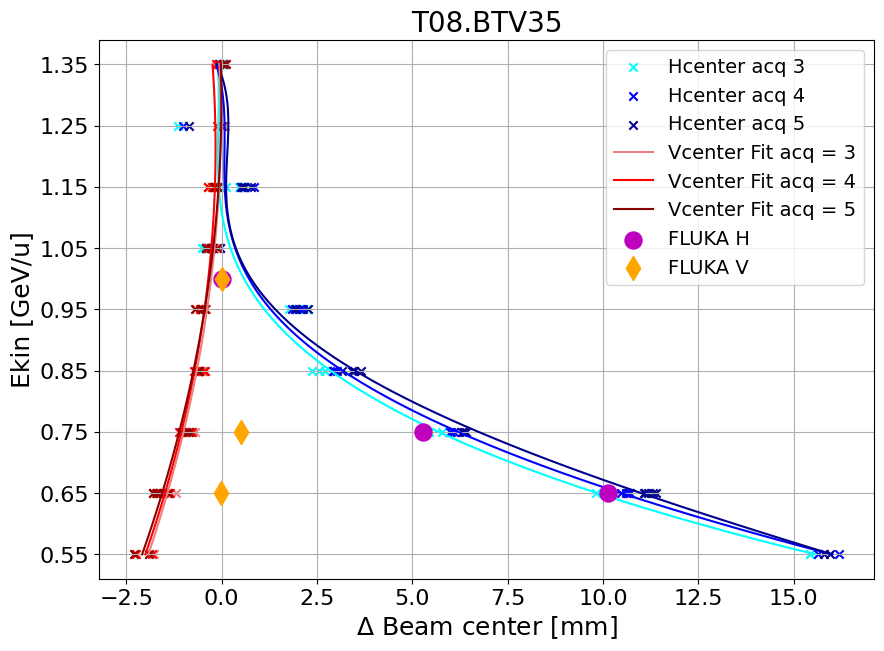

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Define lists of colors for horizontal and vertical planes
horizontal_colors = ['cyan', 'b', 'darkblue']  # You can add more colors as needed
vertical_colors =  ['lightcoral', 'r', 'darkred'] # You can add more colors as needed

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

Hmean_list = []
Vmean_list = []
for i, (file, color) in enumerate(zip([
    "Ekin_vs_beam_center_btv35_acq3.pickle",
    "Ekin_vs_beam_center_btv35_acq4.pickle",
    "Ekin_vs_beam_center_btv35_acq5.pickle",
], horizontal_colors)):

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

        Hmean = np.mean(df_enhanced[df_enhanced.Ekin == 1.35].Hcenter)
        Vmean = np.mean(df_enhanced[df_enhanced.Ekin == 1.35].Vcenter)

        Hmean_list.append(Hmean)
        Vmean_list.append(Vmean)

Hmean_ref = np.mean(Hmean_list)
Vmean_ref = np.mean(Vmean_list)

print(Hmean_ref)
print(Vmean_ref)

# Loop through the files and colors for horizontal planes
for i, (file, color) in enumerate(zip([
    "Ekin_vs_beam_center_btv35_acq3.pickle",
    "Ekin_vs_beam_center_btv35_acq4.pickle",
    "Ekin_vs_beam_center_btv35_acq5.pickle",
], horizontal_colors)):

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

        print(np.mean(df_enhanced[df_enhanced.Ekin == 1.35].Hcenter))

    # Scatter plot for Hcenter with specified color
    ax.scatter(df_enhanced.Hcenter-Hmean_ref, df_enhanced.Ekin, marker="x", c=color, label=f"Hcenter acq {int(df_enhanced.acq[0])}")


    coeffs_h = np.polyfit(df_enhanced.Ekin, df_enhanced.Hcenter-Hmean_ref, 4)
    Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)
    Hcenter_fit = np.polyval(coeffs_h, Ekin_range)
    ax.plot(Hcenter_fit, Ekin_range, c=color)

# Loop through the files and colors for vertical planes
for i, (file, color) in enumerate(zip([
    "Ekin_vs_beam_center_btv35_acq3.pickle",
    "Ekin_vs_beam_center_btv35_acq4.pickle",
    "Ekin_vs_beam_center_btv35_acq5.pickle",
], vertical_colors)):

    with open(file, 'rb') as f:
        df_enhanced = pickle.load(f)

    # Scatter plot for Vcenter with specified color
    ax.scatter(df_enhanced.Vcenter-Vmean_ref, df_enhanced.Ekin, marker="x", c=color)


    coeffs_v = np.polyfit(df_enhanced.Ekin, df_enhanced.Vcenter-Vmean_ref, 2)
    Ekin_range = np.linspace(df_enhanced.Ekin.min(), df_enhanced.Ekin.max(), 100)
    Vcenter_fit = np.polyval(coeffs_v, Ekin_range)
    ax.plot(Vcenter_fit, Ekin_range, c=color, label=f"Vcenter Fit acq = {int(df_enhanced.acq[0])}")


# specify the file paths
file_paths = ['1GeV_dpp_TRAJ_processed.dat', 
              '750MeV_dpp_TRAJ_processed.dat',
              '650MeV_dpp_TRAJ_processed.dat',]


labels = ["FLUKA H", "", ""]
labelsV = ["FLUKA V", "", ""]

# Target value
target_s = 6693.023360310273

energies = [1.0, 0.75, 0.65]

for file_path, label, labelV, energy in zip(file_paths, labels, labelsV, energies):
    # read the file
    print(file_path)
    data = pd.read_csv(file_path)

    data.sort_values(by="S", inplace=True)

    closest_index = (data['S'] - target_s).abs().idxmin()
    closest_row = data.iloc[closest_index]

    # print the closest value (for debugging)
    print(f"Closest S value: {closest_row['S']}, muX: {closest_row['muX']}")

    if "1GeV" in file_path:
        ref = closest_row['muX']
        refy = closest_row['muY']
    
    # plot the data
    ax.scatter(-(closest_row['muX']-ref)*10, energy, marker="o", s=150, color="m", label=label, zorder=99)
    ax.scatter(-(closest_row['muY']-refy)*10, energy, marker="d", s =150, color="orange",  label=labelV, zorder=99)

# configure the plot
ax.set_ylabel("Ekin [GeV/u]")
ax.set_xlabel("$\mu_{H}$ [mm]")
ax.set_title("FLUKA Centroid displacement at BTV35", fontsize=22)
ax.legend()

# ax.set_ylim(0.55, 1.35)
# ax.set_xlim(-2.5, 15)


ax.legend()
ax.grid()
ax.set_yticks(list(df_enhanced.Ekin.unique()))

ax.set_xlabel("$\Delta$ Beam center [mm]")
ax.set_ylabel("Ekin [GeV/u]")
ax.set_title("T08.BTV35")

plt.savefig("Ekin_vs_beam_center_btv35_combined_FLUKA.png", facecolor='white', transparent=False, dpi=300, bbox_inches='tight')
